In [1]:
import matplotlib.pyplot as plt
import simulation as sim
import constant as ct
import numpy as np

# 3.1

(10000,) (10000, 2)


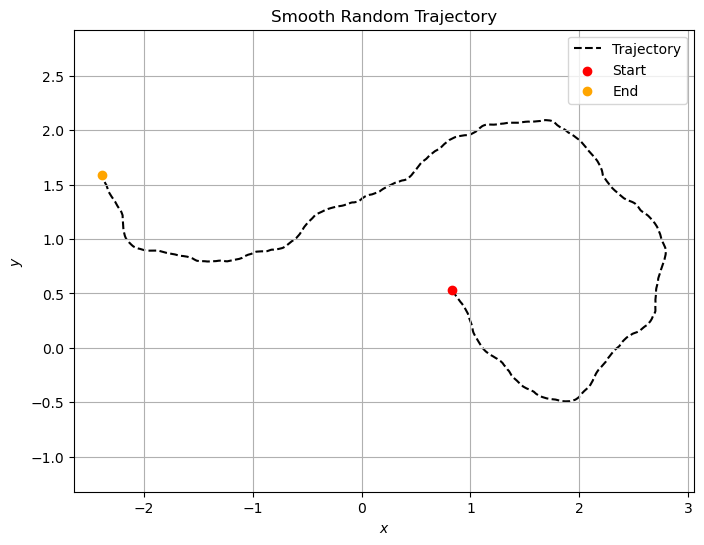

In [2]:
speed = 1e-2  # Constant speed
max_delta_theta = np.pi/60

head_directions, positions = sim.smooth_random_trajectory(ct.T, ct.delta_t, speed, max_delta_theta)
print(head_directions.shape, positions.shape)

# Plot trajectory
plt.figure(figsize=(8, 6))
plt.plot(positions[:, 0], positions[:, 1], label='Trajectory', color='black', ls='--', zorder=1)
plt.scatter(positions[0, 0], positions[0, 1], color='red', label='Start', zorder=2)
plt.scatter(positions[-1, 0], positions[-1, 1], color='orange', label='End', zorder=2)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title('Smooth Random Trajectory')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

(100, 1)


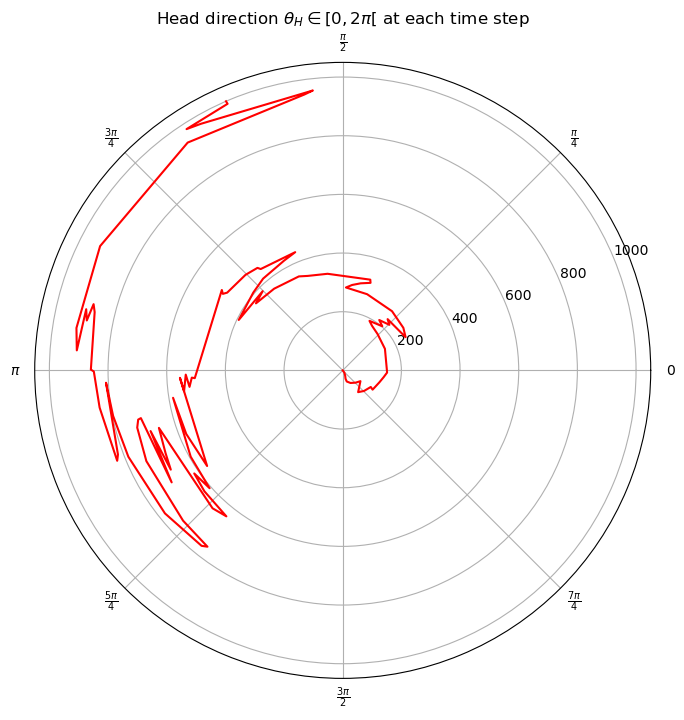

In [24]:
plt.figure(figsize=(8,8))
ax = plt.subplot(111, projection='polar')

head_dir_smooth = sim.bins_spike(head_directions, 10, ct.delta_t, 1, mean=True)
print(head_dir_smooth.shape)
ax.plot(head_dir_smooth, np.linspace(0, ct.T, len(head_dir_smooth)), color='red')

# Set angular ticks to radians
ax.set_xticks(np.linspace(0, 2*np.pi, 8, endpoint=False))  # Set ticks at 0, pi/4, pi/2, 3pi/4, pi, 5pi/4, 3pi/2, 7pi/4
ax.set_xticklabels(['0', r'$\frac{\pi}{4}$', r'$\frac{\pi}{2}$', r'$\frac{3\pi}{4}$', r'$\pi$', r'$\frac{5\pi}{4}$', r'$\frac{3\pi}{2}$', r'$\frac{7\pi}{4}$'])
# Show the plot
plt.title(r'Head direction $\theta_H \in [0, 2\pi[$ at each time step')
plt.show()


# 3.2

In [20]:
head_dirs, positions = sim.smooth_random_trajectory(ct.T, ct.delta_t, speed, max_delta_theta)
network = sim.PoissonNeuron(I_0=1, theta_H=head_dirs)
h,s = network.spike_simulation(input_fct=network.head_external_input, initial_voltage=np.random.uniform(0, 1, ct.N))

h10 = sim.bins_spike(head_dirs, 10, N=1, mean=True)
s10 = sim.bins_spike(s, 10, N=ct.N)
bump_loc = sim.get_bump(s10)

100%|██████████| 9999/9999 [00:00<00:00, 29855.79it/s]

(10000, 300)


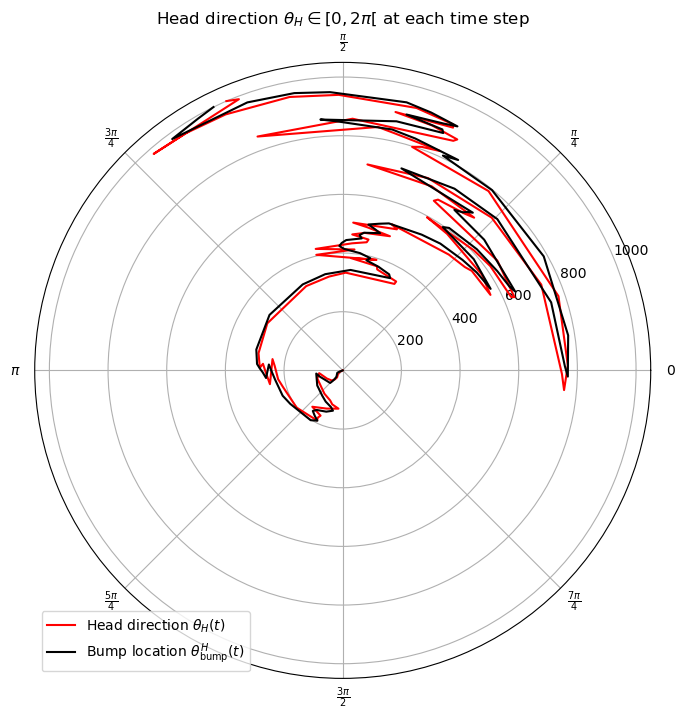

In [23]:
plt.figure(figsize=(8,8))
ax = plt.subplot(111, projection='polar')

ax.plot(h10, np.linspace(0, ct.T, len(h10)), color='red', label=r'Head direction $\theta_H (t)$')
ax.plot(bump_loc, np.linspace(0, ct.T, len(h10)), color='black', label=r'Bump location $\theta^H_{\text{bump}} (t)$')

# Set angular ticks to radians
ax.set_xticks(np.linspace(0, 2*np.pi, 8, endpoint=False))  # Set ticks at 0, pi/4, pi/2, 3pi/4, pi, 5pi/4, 3pi/2, 7pi/4
ax.set_xticklabels(['0', r'$\frac{\pi}{4}$', r'$\frac{\pi}{2}$', r'$\frac{3\pi}{4}$', r'$\pi$', r'$\frac{5\pi}{4}$', r'$\frac{3\pi}{2}$', r'$\frac{7\pi}{4}$'])
plt.title(r'Head direction $\theta_H \in [0, 2\pi[$ at each time step')
plt.legend()
plt.show()